#### Read data

localization data

In [1]:
import pandas as pd 
df1 = pd.read_table("sequences_info/All RNA subcellular localization data.txt")
df1.columns
df1.drop(['RNALocate_ID','Gene_Name', 'Gene_symbol','PMID', 'Description'],axis=1,inplace=True)

df1

C:\Users\cyclone\AppData\Local\Temp\ipykernel_41528\396655709.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_table("sequences_info/All RNA subcellular localization data.txt")


,Gene_ID,RNA_category,Species,SubCellular_Localization
0,NCBI:20983,mRNA,Mus musculus,Nucleus
1,NCBI:20650,mRNA,Mus musculus,Nucleus
2,NCBI:20648,mRNA,Mus musculus,Cytoplasm
3,NCBI:20873,mRNA,Mus musculus,Nucleus
4,NCBI:17764,mRNA,Mus musculus,Cytoplasm
...,...,...,...,...
213424,NaN,Y RNA,Homo sapiens,Microvesicle
213425,NaN,Y RNA,Homo sapiens,Microvesicle
213426,NaN,Y RNA,Homo sapiens,Microvesicle
213427,NaN,Y RNA,Homo sapiens,Microvesicle


sequence data

In [3]:
df2 = pd.read_table("sequences_info/human_RNA_sequence.txt")
df2.drop('Refseq_ID',axis=1,inplace=True)
df2.shape

(133905, 2)

合并

In [4]:
df = pd.merge(df1,df2,how='inner',on='Gene_ID')
df.columns

Index(['Gene_ID', 'RNA_category', 'Species', 'SubCellular_Localization',
       'Sequence'],
      dtype='object')

In [5]:
df.drop_duplicates(subset=['Gene_ID'], keep='first', inplace=True)
df.shape

(21884, 5)

In [44]:
df['SubCellular_Localization'].value_counts()

Exosome                  7028
Cytosol                  5434
Chromatin                2125
Ribosome                 1840
Endoplasmic reticulum    1833
Cytoplasm                1359
Nucleus                  1210
Nucleoplasm               357
Nucleolus                 315
Ribosome-free cytosol     175
Membrane                  126
Insoluble cytoplasm        50
Cytosolic polysome         10
Nuclear                     3
Mitochondrion               3
Cytosolic ribosome          2
ER-bound polysome           2
Polysome                    2
Axon                        1
Soma                        1
Cilia                       1
Neurite                     1
ER-bound ribosome           1
Dendrite                    1
Cell soma                   1
Microsome                   1
Plasma membrane             1
Interior speckle            1
Name: SubCellular_Localization, dtype: int64

In [45]:
df['RNA_category'].value_counts()

mRNA       17826
lncRNA      3281
snoRNA       562
ncRNA         76
pseudo        68
snRNA         35
lincRNA       22
Y RNA          4
scRNA          3
vRNA           3
rRNA           2
miRNA          1
scaRNA         1
Name: RNA_category, dtype: int64

lncRNA单独

In [46]:
df_lnc=df[df['RNA_category'].isin(['lncRNA'])].reset_index(drop=True)
df_lnc.info

<bound method DataFrame.info of              Gene_ID RNA_category       Species SubCellular_Localization  \
0     NCBI:100048912       lncRNA  Homo sapiens                Cytoplasm   
1     NCBI:100124700       lncRNA  Homo sapiens                Cytoplasm   
2     NCBI:100128098       lncRNA  Homo sapiens                Cytoplasm   
3     NCBI:100128191       lncRNA  Homo sapiens                Cytoplasm   
4     NCBI:100129387       lncRNA  Homo sapiens                  Nucleus   
...              ...          ...           ...                      ...   
3276      NCBI:94158       lncRNA  Homo sapiens                  Exosome   
3277       NCBI:9597       lncRNA  Homo sapiens                  Exosome   
3278      NCBI:96597       lncRNA  Homo sapiens                  Exosome   
3279       NCBI:9808       lncRNA  Homo sapiens                  Exosome   
3280       NCBI:9834       lncRNA  Homo sapiens                  Exosome   

                                               Sequence

In [6]:
with open("sequences_info/human.fasta","w") as f:
    for i in range(len(df.Sequence)):
        f.write('>'+str(i)+'\n')
        f.write(df.Sequence.iloc[i]+'\n')

In [ ]:
with open("sequences_info/lnc.fasta","w") as f:
    for i in range(len(df_lnc.Sequence)):
        f.write('>'+str(i)+'\n')
        f.write(df_lnc.Sequence.iloc[i]+'\n')

In [ ]:
# df.sort_values(by="Gene_ID" , inplace=True, ascending=True) 
# df.info

In [7]:
with open('cdhit_results/human_0.8') as fa:
    fa_index = []
    for line in fa:
        # 去除末尾换行符
        line = line.replace('\n','')
        if line.startswith('>'):
            # 去除 > 号
            seq_index = line[1:]
            fa_index.append(int(seq_index))
print(fa_index)

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232

In [49]:
with open('cdhit_results/lnc_0.8') as fa:
    lnc_index = []
    for line in fa:
        # 去除末尾换行符
        line = line.replace('\n','')
        if line.startswith('>'):
            # 去除 > 号
            seq_index = line[1:]
            lnc_index.append(int(seq_index))
print(lnc_index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224,

In [8]:
df = df.iloc[fa_index]
df = df.reset_index(drop=True) # update index
print(df)

              Gene_ID RNA_category       Species SubCellular_Localization  \
0          NCBI:10000         mRNA  Homo sapiens                  Cytosol   
1          NCBI:10001         mRNA  Homo sapiens                 Ribosome   
2      NCBI:100037417         mRNA  Homo sapiens                 Ribosome   
3          NCBI:10005         mRNA  Homo sapiens                  Cytosol   
4          NCBI:10006         mRNA  Homo sapiens                  Cytosol   
...               ...          ...           ...                      ...   
20698      NCBI:84546       snoRNA  Homo sapiens                  Exosome   
20699      NCBI:85389       snoRNA  Homo sapiens                  Exosome   
20700       NCBI:8944       snoRNA  Homo sapiens                  Exosome   
20701  NCBI:101447996        snRNA  Homo sapiens                  Exosome   
20702       NCBI:6090        Y RNA  Homo sapiens                  Exosome   

                                                Sequence  
0      ACCATTTCT

In [51]:
df_lnc = df_lnc.iloc[lnc_index]
df_lnc = df_lnc.reset_index(drop=True) # update index
print(df_lnc)

             Gene_ID RNA_category       Species SubCellular_Localization  \
0     NCBI:100048912       lncRNA  Homo sapiens                Cytoplasm   
1     NCBI:100124700       lncRNA  Homo sapiens                Cytoplasm   
2     NCBI:100128098       lncRNA  Homo sapiens                Cytoplasm   
3     NCBI:100128191       lncRNA  Homo sapiens                Cytoplasm   
4     NCBI:100129387       lncRNA  Homo sapiens                  Nucleus   
...              ...          ...           ...                      ...   
3170      NCBI:94158       lncRNA  Homo sapiens                  Exosome   
3171       NCBI:9597       lncRNA  Homo sapiens                  Exosome   
3172      NCBI:96597       lncRNA  Homo sapiens                  Exosome   
3173       NCBI:9808       lncRNA  Homo sapiens                  Exosome   
3174       NCBI:9834       lncRNA  Homo sapiens                  Exosome   

                                               Sequence  
0     AGCTACATCCGTCACCTGACACG

In [52]:
df['RNA_category'].value_counts()

mRNA       17159
lncRNA      3042
snoRNA       343
ncRNA         75
pseudo        50
lincRNA       22
snRNA          7
miRNA          1
vRNA           1
scRNA          1
scaRNA         1
Y RNA          1
Name: RNA_category, dtype: int64

In [9]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *

In [10]:

def sort(data_sort):
    length = len(data_sort.values)
    indexs = [str(x) for x in data_sort.index]
    for i, j in zip(range(0, length, 2), range(length-1, 0, -2)):
        if j <= i:
            break
        data_sort.iloc[i],data_sort.iloc[j] = data_sort.iloc[j],data_sort.iloc[i]
        indexs[i], indexs[j] = indexs[j], indexs[i]
        data_sort = pd.Series(data_sort.values, index=indexs)
    return data_sort

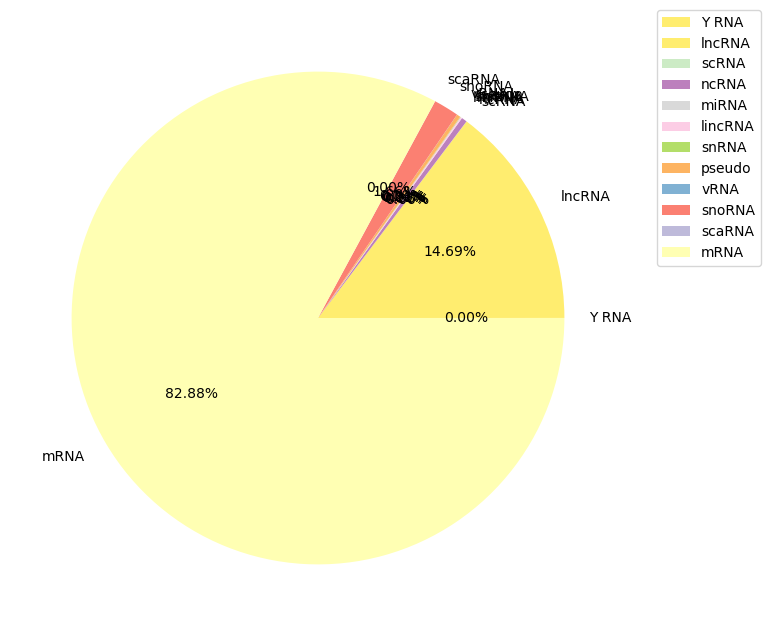

<Figure size 640x480 with 0 Axes>

In [11]:
from matplotlib import cm
colors = cm.Set3_r(np.arange(13) /13)
sort(data_sort = df['RNA_category'].value_counts()).plot.pie(figsize=(8, 8),autopct='%.2f%%',colors=colors)
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.show()
plt.savefig(fname="/home/chengyujia/process_data/figure/type_all.svg",format="svg")

In [56]:
df['SubCellular_Localization'].value_counts()

Exosome                  6274
Cytosol                  5309
Chromatin                2078
Endoplasmic reticulum    1803
Ribosome                 1764
Cytoplasm                1292
Nucleus                  1162
Nucleoplasm               351
Nucleolus                 308
Ribosome-free cytosol     163
Membrane                  119
Insoluble cytoplasm        48
Cytosolic polysome         10
Nuclear                     3
Mitochondrion               3
Cytosolic ribosome          2
ER-bound polysome           2
Polysome                    2
Axon                        1
Soma                        1
Cilia                       1
Neurite                     1
ER-bound ribosome           1
Dendrite                    1
Cell soma                   1
Microsome                   1
Plasma membrane             1
Interior speckle            1
Name: SubCellular_Localization, dtype: int64

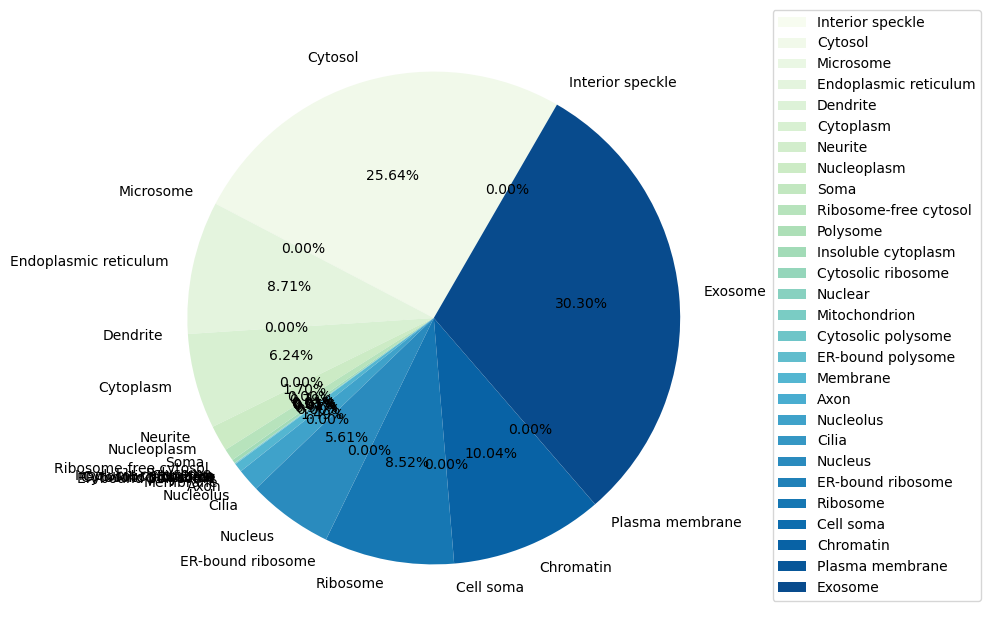

In [57]:
colors = cm.GnBu(np.arange(len(df['SubCellular_Localization'].value_counts())) /len(df['SubCellular_Localization'].value_counts()))
sort(df['SubCellular_Localization'].value_counts()).plot.pie(figsize=(8, 8),autopct='%.2f%%',colors=colors,startangle=60)
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)

In [58]:
df_lnc['SubCellular_Localization'].value_counts()

Exosome                2248
Chromatin               328
Nucleus                 208
Cytoplasm               104
Nucleoplasm              95
Cytosol                  93
Nucleolus                65
Membrane                 24
Insoluble cytoplasm       6
Nuclear                   2
Microsome                 1
Soma                      1
Name: SubCellular_Localization, dtype: int64

In [59]:
df=df[df['SubCellular_Localization'].isin(['Exosome','Nucleus','Cytosol','Endoplasmic reticulum','Chromatin','Cytoplasm','Ribosome'])]
df['SubCellular_Localization'].value_counts()

Exosome                  6274
Cytosol                  5309
Chromatin                2078
Endoplasmic reticulum    1803
Ribosome                 1764
Cytoplasm                1292
Nucleus                  1162
Name: SubCellular_Localization, dtype: int64

In [60]:
df.info

<bound method DataFrame.info of               Gene_ID RNA_category       Species SubCellular_Localization  \
0          NCBI:10000         mRNA  Homo sapiens                  Cytosol   
1          NCBI:10001         mRNA  Homo sapiens                 Ribosome   
2      NCBI:100037417         mRNA  Homo sapiens                 Ribosome   
3          NCBI:10005         mRNA  Homo sapiens                  Cytosol   
4          NCBI:10006         mRNA  Homo sapiens                  Cytosol   
...               ...          ...           ...                      ...   
20698      NCBI:84546       snoRNA  Homo sapiens                  Exosome   
20699      NCBI:85389       snoRNA  Homo sapiens                  Exosome   
20700       NCBI:8944       snoRNA  Homo sapiens                  Exosome   
20701  NCBI:101447996        snRNA  Homo sapiens                  Exosome   
20702       NCBI:6090        Y RNA  Homo sapiens                  Exosome   

                                           

In [61]:
df_lnc=df_lnc[df_lnc['SubCellular_Localization'].isin(['Exosome','Nucleus','Cytosol','Chromatin','Cytoplasm','Nucleoplasm', 'Ribosome','Nucleolus','Membrane'])]
df_lnc['SubCellular_Localization'].value_counts()

Exosome        2248
Chromatin       328
Nucleus         208
Cytoplasm       104
Nucleoplasm      95
Cytosol          93
Nucleolus        65
Membrane         24
Name: SubCellular_Localization, dtype: int64

In [62]:
df_lnc.info

<bound method DataFrame.info of              Gene_ID RNA_category       Species SubCellular_Localization  \
0     NCBI:100048912       lncRNA  Homo sapiens                Cytoplasm   
1     NCBI:100124700       lncRNA  Homo sapiens                Cytoplasm   
2     NCBI:100128098       lncRNA  Homo sapiens                Cytoplasm   
3     NCBI:100128191       lncRNA  Homo sapiens                Cytoplasm   
4     NCBI:100129387       lncRNA  Homo sapiens                  Nucleus   
...              ...          ...           ...                      ...   
3170      NCBI:94158       lncRNA  Homo sapiens                  Exosome   
3171       NCBI:9597       lncRNA  Homo sapiens                  Exosome   
3172      NCBI:96597       lncRNA  Homo sapiens                  Exosome   
3173       NCBI:9808       lncRNA  Homo sapiens                  Exosome   
3174       NCBI:9834       lncRNA  Homo sapiens                  Exosome   

                                               Sequence

In [63]:
df.drop(['Gene_ID','RNA_category','Species'], axis=1)
order=['Sequence','SubCellular_Localization']
df=df[order].reset_index(drop=True)

In [64]:
df_lnc.drop(['Gene_ID','RNA_category','Species'], axis=1)
order=['Sequence','SubCellular_Localization']
df_lnc=df_lnc[order].reset_index(drop=True)

In [72]:
def labelize(loc):
    if loc == "Exosome":
        return 0
    if loc == "Cytosol":
        return 1
    if loc == "Chromatin":
        return 2
    if loc == "Ribosome":
        return 3
    if loc == "Endoplasmic reticulum":
        return 4
    if loc == "Cytoplasm":
        return 5    
    if loc == "Nucleus":
        return 6

In [66]:
def labelize_lnc(loc):
    if loc == "Exosome":
        return 0
    if loc == "Cytosol":
        return 1
    if loc == "Chromatin":
        return 2
    if loc == "Nucleoplasm":
        return 3
    if loc == "Membrane":
        return 4
    if loc == "Cytoplasm":
        return 1   
    if loc == "Nucleus":
        return 3
    if loc == "Nucleolus":
        return 3
    


In [73]:
df['SubCellular_Localization']=df.apply(lambda x: labelize(x.SubCellular_Localization),axis=1)
df.columns=['sequence','label']
df.info

AttributeError: 'Series' object has no attribute 'SubCellular_Localization'

In [68]:
df_lnc['SubCellular_Localization']=df_lnc.apply(lambda x: labelize_lnc(x.SubCellular_Localization),axis=1)
df_lnc.columns=['sequence','label']
df_lnc.info

<bound method DataFrame.info of                                                sequence  label
0     AGCTACATCCGTCACCTGACACGGCCCTACCAGGAACAGCCGCGCT...      1
1     CCAGTTCTCAGGCGAGAGCCGCGGCTGACAGGGTCTGGGACAGAAG...      1
2     GAGAAGGGAGGAGTTATTCAGGCCTCCGCCAGCTTCTAGGCCCTGG...      1
3     GGGAGGGGCTGCAAACGGCGGCGAGCGCGCGCGGCAACCGCCAAAC...      1
4     TGATGAACTGTGCCCTGGCAGAGATGACCTGGCAAAATTCTCAACT...      3
...                                                 ...    ...
3160  CGCTCAAGAGAGCAAGATGTTCTCGTGTTGCTTCTCCACTTTGAGA...      0
3161  TGATCTGAAAGGAATGGAAGCACAAAATGATGAATAAGGTATTTTT...      0
3162  GAAAACGAAGCCCCCTCCTGTATTGACAGCTGGGAATTGTGGAGTC...      0
3163  AATCATCTCATCTCAGATGCCTGGCAACATCTAATTCCTCAGCTCC...      0
3164  AGGGTTGTCTGGATGGGCAGGAAGAGCAGCGGGGGAGAAAGGGCTG...      0

[3165 rows x 2 columns]>

In [69]:
df_lnc["label"].value_counts()

0    2248
3     368
2     328
1     197
4      24
Name: label, dtype: int64

In [70]:
df.to_csv('dataset.txt',sep='\t',index=False)

In [ ]:
df.info

In [71]:
df_lnc.to_csv('dataset_lnc.txt',sep='\t',index=False)